In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from os import path, listdir
import datetime as dt
import numpy as np

In [3]:
dfs = []
dirs = sorted(listdir('.'))
print(dirs)
dfs = [pd.read_csv(file, comment='#') for file in dirs if file[-3:] == 'csv']

['TUMOR_2024_04_24_13_16_41.csv', 'TUMOR_2024_04_24_14_02_58.csv', 'TUMOR_2024_04_24_14_38_34.csv', 'TUMOR_2024_04_24_15_15_39.csv', 'process_asc.ipynb', 'process_space_center.ipynb']


In [4]:
df = pd.concat(dfs)

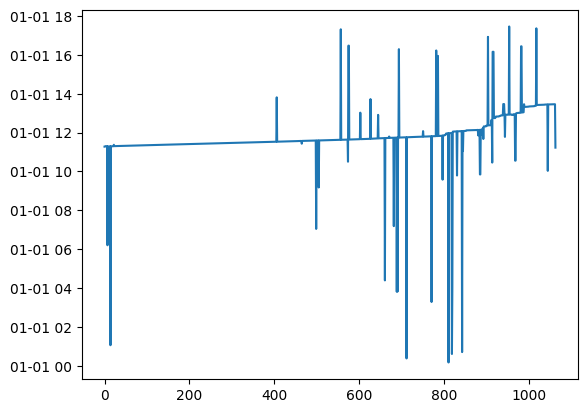

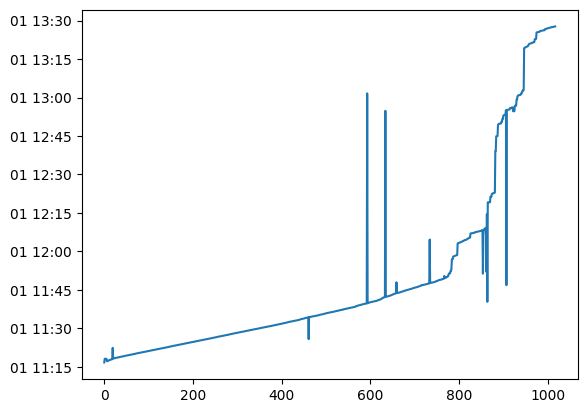

In [5]:
time = pd.to_datetime(df[f'time_GPS'], format='%H:%M:%S')
plt.plot(time.to_numpy())
time_mask = (time<'1900-01-01 13:27:42')&(time>'1900-01-01 11:16:42')
time_cut = time[time_mask].to_numpy()
plt.show()
plt.plot(time_cut)

In [6]:

delta = pd.Timedelta(seconds=60)
for i in range(1, time_cut.shape[0] - 1):
    [a, b, c] = list(time_cut[i-1:i+2])
    if (b - a > delta and b - c > delta) or (a - b > delta and c - b > delta):
        jump = pd.Timedelta(time_cut[i + 1] - time_cut[i - 1])
        time_cut[i] = time_cut[i - 1] +  jump / 2

for i in range(1, time_cut.shape[0] - 1):
    [a, b, c] = list(time_cut[i-1:i+2])
    if (b - a > delta and b - c > delta) or (a - b > delta and c - b > delta):
        jump = pd.Timedelta(time_cut[i + 1] - time_cut[i - 1])
        time_cut[i] = time_cut[i - 1] +  jump / 2

In [7]:
time[time_mask] = time_cut
time[~time_mask] = np.nan

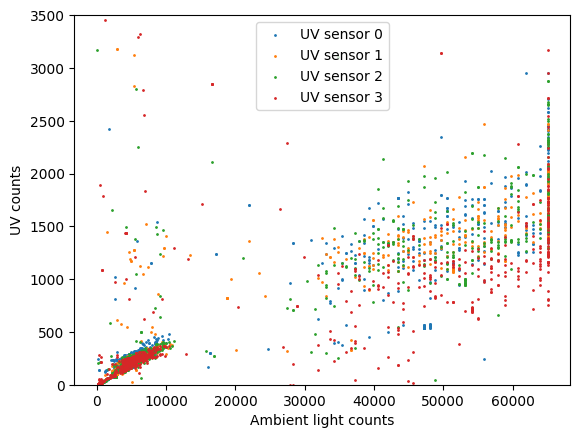

In [8]:
for i in range(4):
    plt.scatter(df[f'AL_{i}'], df[f'UV_{i}'], s=1, label=f'UV sensor {i}')
plt.ylim((0, 3500))
plt.xlabel('Ambient light counts')
plt.ylabel('UV counts')
plt.legend()

In [9]:
df.columns

Index(['UV_0', 'AL_0', 'Mx_0', 'My_0', 'Mz_0', 'time_0', 'UV_1', 'AL_1',
       'Mx_1', 'My_1', 'Mz_1', 'time_1', 'UV_2', 'AL_2', 'Mx_2', 'My_2',
       'Mz_2', 'time_2', 'UV_3', 'AL_3', 'Mx_3', 'My_3', 'Mz_3', 'time_3',
       'lon_deg', 'lon_min', 'lon_sec', 'lat_deg', 'lat_min', 'lat_sec', 'alt',
       'time_GPS', 'temperature', 'pressure', 'RSSI'],
      dtype='object')

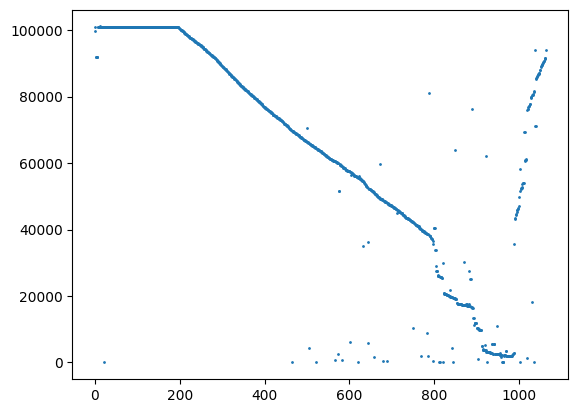

In [10]:
p = df['pressure'].to_numpy()
plt.scatter(np.arange(p.shape[0]), p, s=1)

(0.0, 30000.0)

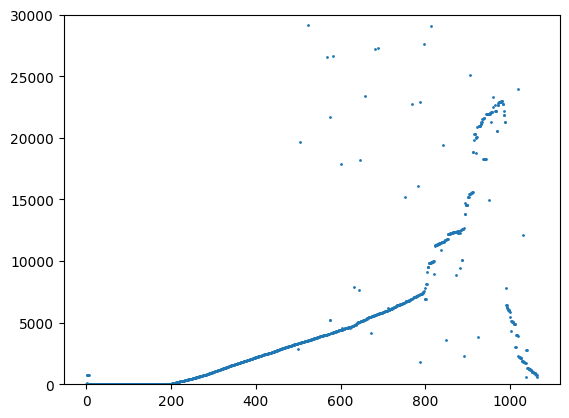

In [11]:
T0 = 282
p0 = 100900
alpha = -0.0065
R = 287.06
g0 = 9.81

h = T0 / alpha * ((p / p0) ** (-alpha * R / g0) - 1)
plt.scatter(np.arange(h.shape[0]), h, s=1)
plt.ylim((0, 30000))

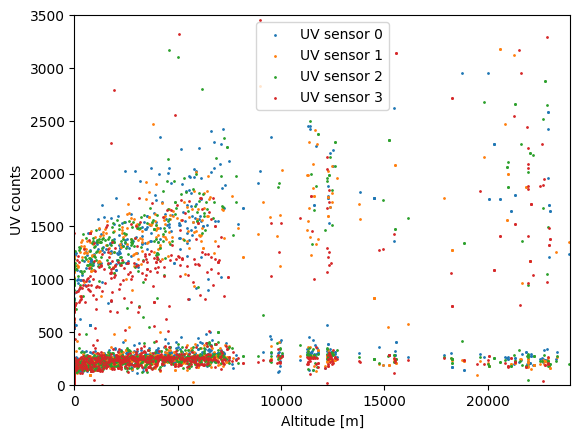

In [12]:
for i in range(4):
    plt.scatter(h, df[f'UV_{i}'], s=1, label=f'UV sensor {i}')
plt.ylim((0, 3500))
plt.xlim((0, 24000))
plt.xlabel('Altitude [m]')
plt.ylabel('UV counts')
plt.legend()

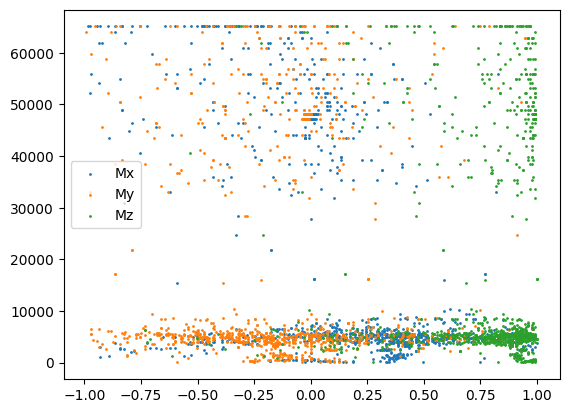

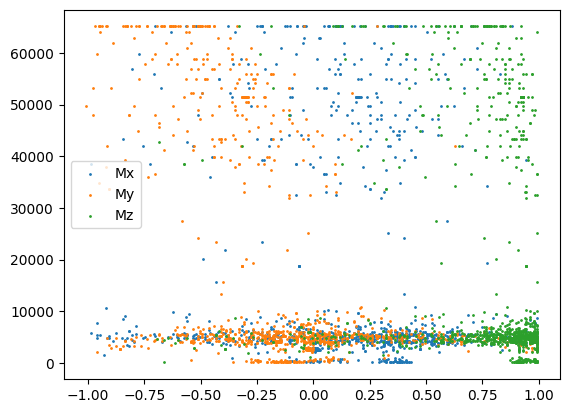

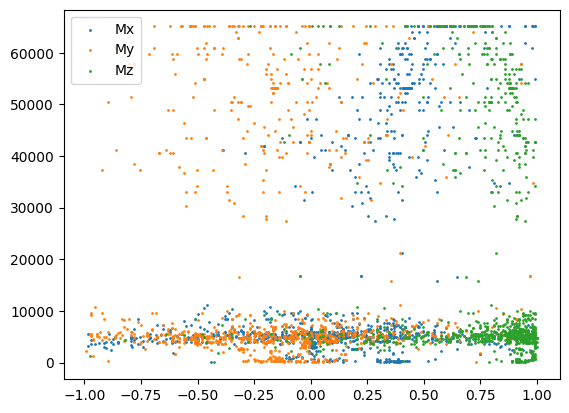

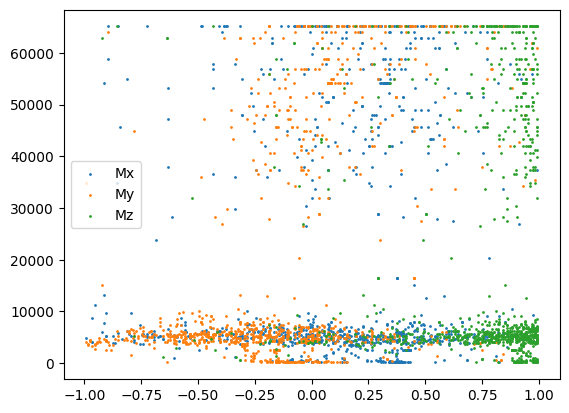

In [13]:
xs = np.arange(df.shape[0])
for i in range(4):
    for d in ['x', 'y', 'z']:
        plt.scatter(df[f'M{d}_{i}'], df[f'AL_{i}'], s=1, label=f'M{d}')
    plt.legend()
    plt.show()


(0.0, 200.0)

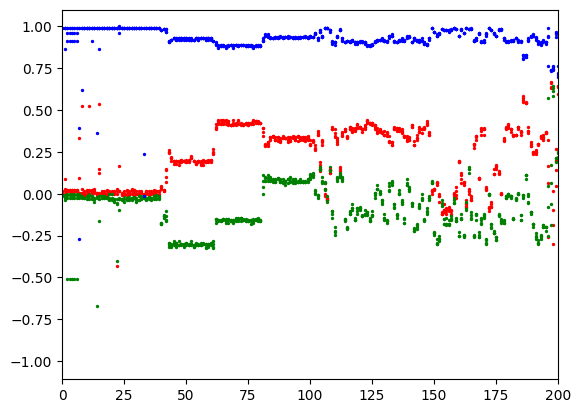

In [14]:
xs = np.arange(df.shape[0])
colours = {'x': 'r', 'y': 'g', 'z': 'b'}
for i in range(4):
    for d in ['x', 'y', 'z']:
        plt.scatter(xs, df[f'M{d}_{i}'].to_numpy(), label=f'M{d}', s=2, c=colours[d])
plt.xlim((0, 200))

(0.0, 400.0)

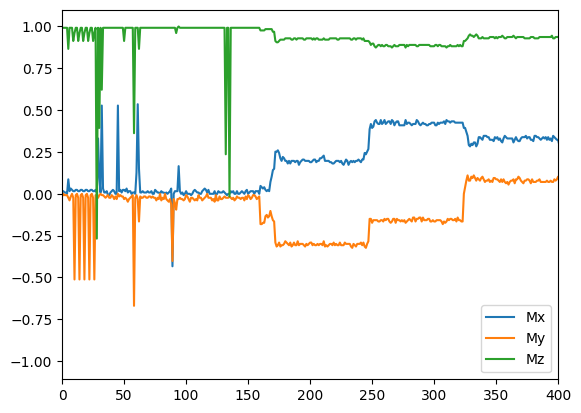

In [17]:
mxs = np.array([df[f'Mx_{i}'].to_numpy() for i in range(4)]).T.reshape(df.shape[0] * 4)
mys = np.array([df[f'My_{i}'].to_numpy() for i in range(4)]).T.reshape(df.shape[0] * 4)
mzs = np.array([df[f'Mz_{i}'].to_numpy() for i in range(4)]).T.reshape(df.shape[0] * 4)
plt.plot(np.arange(mxs.shape[0]), mxs, label='Mx')
plt.plot(np.arange(mxs.shape[0]), mys, label='My')
plt.plot(np.arange(mxs.shape[0]), mzs, label='Mz')
plt.legend()
plt.xlim((0, 400))